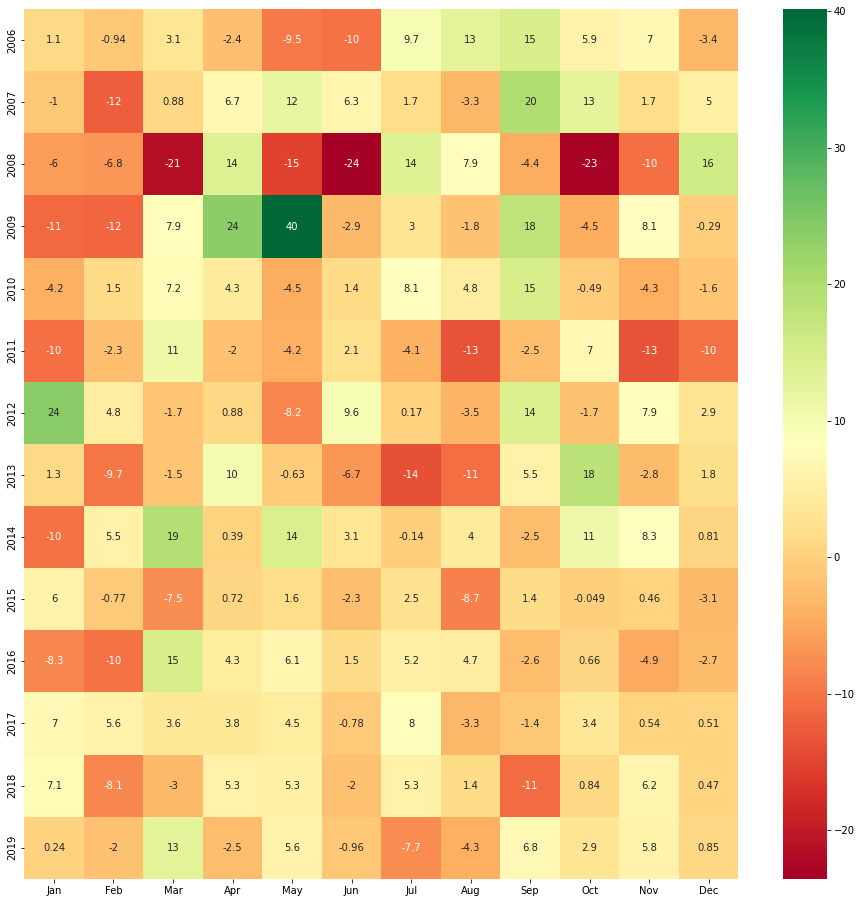

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv("3131.csv")


def getYearFromDate(date):
    '''Input: row number
    return: year of date of that row in dataframe'''

    return datetime.strptime(date, '%Y-%m-%d').year


def getDateObjectFromRow(rowIndex):
    '''Input: row number
    return: datetime object of date of that row in dataframe'''

    return datetime.strptime(df.iloc[rowIndex]['datetime'], '%Y-%m-%d')


rowIndex = sorted(set([getYearFromDate(date) for date in df['datetime']]))
colIndex = ['Jan', 'Feb', 'Mar', 'Apr', 'May',
            'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_percent = pd.DataFrame(
    columns=colIndex, index=rowIndex, dtype=float).fillna(0)


month_open_index = 0  # 1st data is month open data
for i in range(df.shape[0]):

    current_date = getDateObjectFromRow(i)
    month_open_date = getDateObjectFromRow(month_open_index)

    # new month has started, i-1 was month close
    if (current_date.month != month_open_date.month or i == df.shape[0]-1):
        month_closing_price = df.loc[i]['close'] if i == df.shape[0] - \
            1 else df.loc[i-1]['close']
        month_open_price = df.loc[month_open_index]['open']
        month_percent = (month_closing_price -
                         month_open_price)/month_open_price * 100
        df_percent.loc[month_open_date.year][month_open_date.strftime(
            '%b')] = month_percent

        month_open_index = i  # this is new month start


plt.figure(figsize=(16, 16))
heatmap_plot = sns.heatmap(data=df_percent, annot=True, cmap='RdYlGn')
plt.savefig("MonthlyPercent")


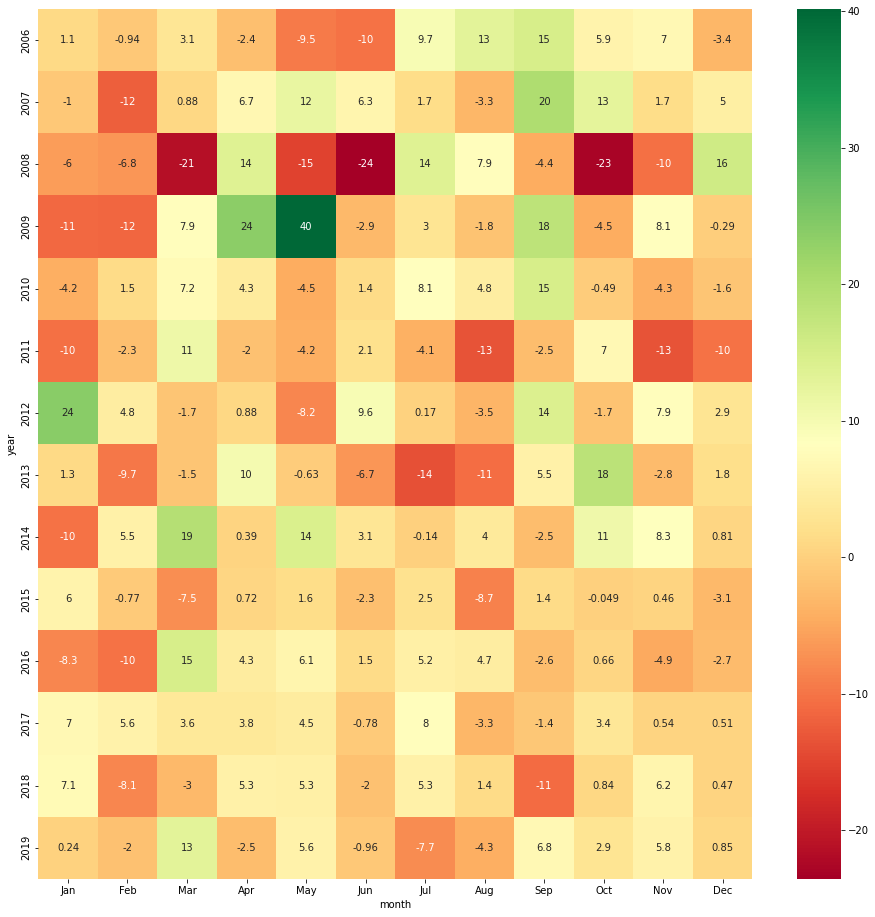

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("3131.csv")

df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
df = df.sort_values('datetime')

df['year'] = df.apply(lambda x: x['datetime'].year, axis=1)
df['month'] = df.apply(lambda x: x['datetime'].month, axis=1)

df_first = df.groupby(['year', 'month']).agg(
    'first').reset_index()[['year', 'month', 'open']]

df_last = df.groupby(['year', 'month']).agg(
    'last').reset_index()[['year', 'month', 'close']]

df_first.rename(columns={'open': 'month_open_price'}, inplace=True)
df_last.rename(columns={'close': 'month_closing_price'}, inplace=True)

df_merged = df_first.merge(df_last, on=['year', 'month'])

df_merged['return'] = df_merged.apply(lambda x: (
    x['month_closing_price'] - x['month_open_price'])*100/x['month_open_price'], axis=1)

df_merged = df_merged[['year', 'month', 'return']]

final_df = df_merged.pivot_table(index='year', columns='month')

final_df.columns = final_df.columns.droplevel()

final_df.rename(columns={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
                         6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)

plt.figure(figsize=(16, 16))
heatmap_plot = sns.heatmap(data=final_df, annot=True, cmap='RdYlGn')
plt.savefig("MonthlyPercent")


In [5]:
df_percent.to_csv("firstSol.csv", encoding='utf-8', index=False)
final_df.to_csv("secondSol.csv", encoding='utf-8', index=False)